 # import libraries


In [4]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

np.random.seed(42)
tf.random.set_seed(42)

 # import dataset


In [5]:
# import dataset
from keras.datasets import cifar10 
'''
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
'''

'\n0: airplane\n1: automobile\n2: bird\n3: cat\n4: deer\n5: dog\n6: frog\n7: horse\n8: ship\n9: truck\n'

In [6]:
# load data
(trainX,trainY),(testX,testY)=cifar10.load_data()
# convert from integer to float
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

# Splitting the dataset into the Training set and Test set


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_norm, trainY, test_size = 0.1, random_state = 42)

In [8]:
# shapes
print('X_train shape',X_train.shape)
print('X_test shape',X_val.shape)

X_train shape (45000, 32, 32, 3)
X_test shape (5000, 32, 32, 3)


In [9]:
# show smaple from data 
X_train[0]

array([[[0.07058824, 0.04705882, 0.09411765],
        [0.08627451, 0.0627451 , 0.10980392],
        [0.10588235, 0.08235294, 0.12941177],
        ...,
        [0.10196079, 0.07450981, 0.11764706],
        [0.05490196, 0.04313726, 0.07058824],
        [0.04313726, 0.03921569, 0.0627451 ]],

       [[0.07058824, 0.04705882, 0.09411765],
        [0.08235294, 0.05882353, 0.10588235],
        [0.09803922, 0.07450981, 0.12156863],
        ...,
        [0.10588235, 0.09019608, 0.1254902 ],
        [0.08235294, 0.08235294, 0.10588235],
        [0.06666667, 0.07058824, 0.09411765]],

       [[0.09019608, 0.06666667, 0.11372549],
        [0.08627451, 0.0627451 , 0.10980392],
        [0.07843138, 0.05490196, 0.10196079],
        ...,
        [0.11372549, 0.10980392, 0.14509805],
        [0.09803922, 0.10196079, 0.1254902 ],
        [0.08235294, 0.09803922, 0.11764706]],

       ...,

       [[0.17254902, 0.09411765, 0.13725491],
        [0.1882353 , 0.10196079, 0.14901961],
        [0.21568628, 0

we should scaled data to make varience from the data is very close and make the process of learn more compatiable and avoid vanishing and exploding

# Show sample from the data

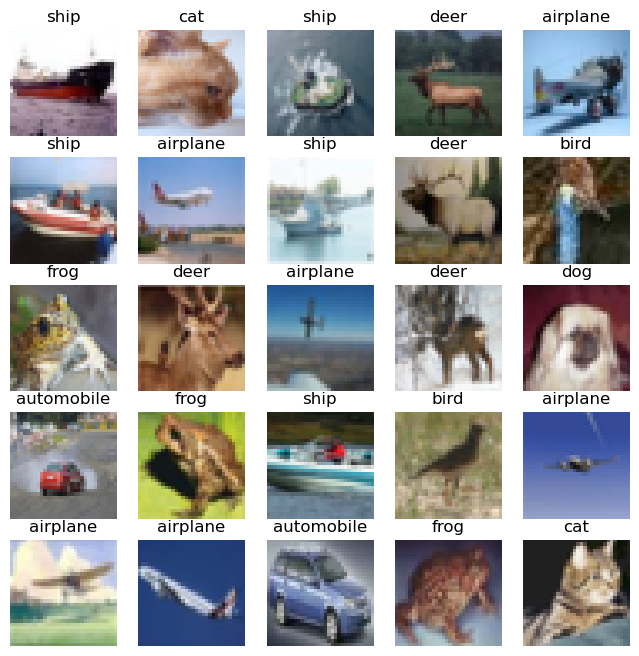

In [10]:
df=pd.DataFrame(y_train)
df.columns=['Labels']
lables={0:'airplane',1: 'automobile',2:'bird',3:'cat',4:'deer',
        5: 'dog',6: 'frog',7: 'horse',8: 'ship',9: 'truck'}

fig,ax=plt.subplots(5,5,figsize=(8,8))
for i in range(5):
    for j in range(5):
        # select random num of img from all the 500000 images
        random_img=np.random.choice(range(len(X_train)))
        # remove crrodinates from img
        ax[i][j].set_axis_off()
        # show the img
        ax[i][j].imshow(X_train[random_img , : ])
        ax[i][j].set_title(lables[df['Labels'][random_img]])

# bulid the base model

In [11]:
# bulid the model
model=keras.models.Sequential([
    # First Conv2D layer
    keras.layers.Conv2D(filters=32,kernel_size=5,input_shape=[32,32,3]),
    keras.layers.MaxPool2D(pool_size=2),
    # second Conv2D layer
    keras.layers.Conv2D(filters=32,kernel_size=5),
    # flatten layer
    keras.layers.Flatten(),
    # First layer for deep neural net
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.5),
    # target layer
    keras.layers.Dense(units=10,activation='softmax'),
])

In [26]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 256)               819456    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [27]:
# comopile the model
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [28]:
# train data
history=model.fit(X_train,y_train,validation_data= (X_val, y_val),batch_size=50,epochs=50)

Epoch 1/20
450/450 [==============================] - 13s 26ms/step - loss: 1.6346 - accuracy: 0.4197 - val_loss: 1.3540 - val_accuracy: 0.5322
Epoch 2/20
450/450 [==============================] - 11s 25ms/step - loss: 1.3543 - accuracy: 0.5274 - val_loss: 1.1618 - val_accuracy: 0.5984
Epoch 3/20
450/450 [==============================] - 11s 25ms/step - loss: 1.2516 - accuracy: 0.5681 - val_loss: 1.1643 - val_accuracy: 0.6074
Epoch 4/20
450/450 [==============================] - 12s 26ms/step - loss: 1.1577 - accuracy: 0.6018 - val_loss: 1.0969 - val_accuracy: 0.6222
Epoch 5/20
450/450 [==============================] - 11s 25ms/step - loss: 1.1133 - accuracy: 0.6201 - val_loss: 1.0071 - val_accuracy: 0.6602
Epoch 6/20
450/450 [==============================] - 11s 25ms/step - loss: 1.0621 - accuracy: 0.6370 - val_loss: 1.0356 - val_accuracy: 0.6552
Epoch 7/20
450/450 [==============================] - 12s 26ms/step - loss: 1.0163 - accuracy: 0.6517 - val_loss: 1.0209 - val_accuracy:

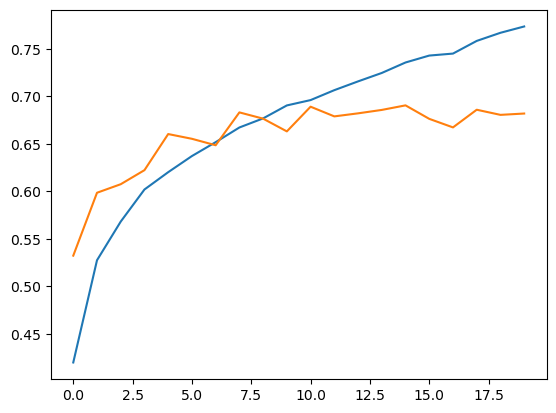

In [30]:
# plot data to see the gap
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

model overfitting

to solve overfitting we will try to 

1-used L1,L2 regularization

2-used Dropout and batchnormaliztion

3-change the architecture

4-data augmentation

5-enhancement all images



# Improvement 1 

In [52]:
# bulid the model
model=keras.models.Sequential([
    # First Conv2D layer
    keras.layers.Conv2D(filters=64,kernel_size=7,input_shape=[32,32,3],
                        padding='same',kernel_initializer='he_normal'),
    keras.layers.MaxPool2D(pool_size=2),
    # second Conv2D layer
    keras.layers.Conv2D(filters=64,kernel_size=7,padding='same',kernel_initializer='he_normal'),
    # flatten layer
    keras.layers.Flatten(),
    
    # First layer for deep neural net
    keras.layers.Dense(units=256,activation='selu',kernel_initializer='lecun_normal'),
    # second layer
    keras.layers.Dense(units=128,activation='selu',kernel_initializer='lecun_normal'),
    # third layer
    keras.layers.Dense(units=64,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.Dropout(0.5),
    
    # output layer
    keras.layers.Dense(units=10,activation='softmax'),
])

In [53]:
# comopile the model
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [54]:
# train data
history=model.fit(X_train,y_train,validation_data= (X_val, y_val),batch_size=50,epochs=50)

Epoch 1/20
450/450 [==============================] - 82s 179ms/step - loss: 2.2530 - accuracy: 0.3263 - val_loss: 1.4569 - val_accuracy: 0.4764
Epoch 2/20
450/450 [==============================] - 85s 190ms/step - loss: 1.4966 - accuracy: 0.4733 - val_loss: 1.2872 - val_accuracy: 0.5496
Epoch 3/20
450/450 [==============================] - 89s 198ms/step - loss: 1.2909 - accuracy: 0.5502 - val_loss: 1.2519 - val_accuracy: 0.5664
Epoch 4/20
450/450 [==============================] - 87s 192ms/step - loss: 1.1598 - accuracy: 0.5987 - val_loss: 1.1260 - val_accuracy: 0.6022
Epoch 5/20
450/450 [==============================] - 84s 187ms/step - loss: 1.0409 - accuracy: 0.6432 - val_loss: 1.1168 - val_accuracy: 0.6156
Epoch 6/20
450/450 [==============================] - 86s 192ms/step - loss: 0.9491 - accuracy: 0.6754 - val_loss: 1.1053 - val_accuracy: 0.6200
Epoch 7/20
450/450 [==============================] - 84s 187ms/step - loss: 0.8537 - accuracy: 0.7109 - val_loss: 1.0651 - val_ac

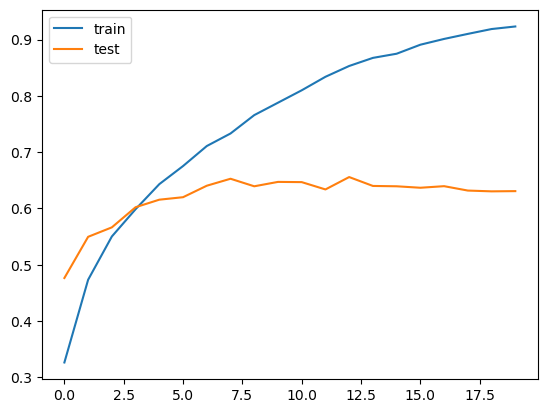

In [59]:
# plot accuracy to see the gap 
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

model overfitting 

model learn very good in training but this learn not the best very bad

# Improvement  2

# Regularization techniques

# 1-batch normalization with dropout

In [88]:
# bulid the model
model=keras.models.Sequential([
    # First Conv2D layer
    keras.layers.Conv2D(filters=64,kernel_size=5,input_shape=[32,32,3],
                        padding='same',activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.MaxPool2D(pool_size=2),
    # second Conv2D layer
    keras.layers.Conv2D(filters=64,kernel_size=5,padding='same',activation='selu',
                        kernel_initializer='lecun_normal'),
    keras.layers.MaxPool2D(pool_size=2),
    # flatten layer
    keras.layers.Flatten(),
    
    # First layer for deep neural net
    keras.layers.Dense(units=200,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.Dropout(0.3),
    # second layer
    keras.layers.Dense(units=100,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    # third layer
    keras.layers.Dense(units=75,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    # output layer
    keras.layers.Dense(units=10,activation='softmax',kernel_initializer='glorot_normal'),
])

In [89]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 4096)              0         
                                                                 
 dense_44 (Dense)            (None, 200)             

In [81]:
# comopile the model
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='nadam')

In [82]:
# train data
history=model.fit(X_train,y_train,validation_data= (X_val, y_val),batch_size=50,epochs=50)

Epoch 1/20
950/950 [==============================] - 64s 64ms/step - loss: 1.6028 - accuracy: 0.4351 - val_loss: 1.3017 - val_accuracy: 0.5488
Epoch 2/20
950/950 [==============================] - 61s 64ms/step - loss: 1.1794 - accuracy: 0.5841 - val_loss: 1.0792 - val_accuracy: 0.6140
Epoch 3/20
950/950 [==============================] - 58s 61ms/step - loss: 1.0422 - accuracy: 0.6391 - val_loss: 0.9184 - val_accuracy: 0.6780
Epoch 4/20
950/950 [==============================] - 58s 61ms/step - loss: 0.9354 - accuracy: 0.6766 - val_loss: 0.8555 - val_accuracy: 0.7072
Epoch 5/20
950/950 [==============================] - 61s 65ms/step - loss: 0.8454 - accuracy: 0.7085 - val_loss: 0.8848 - val_accuracy: 0.6936
Epoch 6/20
950/950 [==============================] - 61s 64ms/step - loss: 0.7676 - accuracy: 0.7381 - val_loss: 0.7964 - val_accuracy: 0.7336
Epoch 7/20
950/950 [==============================] - 62s 65ms/step - loss: 0.6862 - accuracy: 0.7649 - val_loss: 0.8760 - val_accuracy:

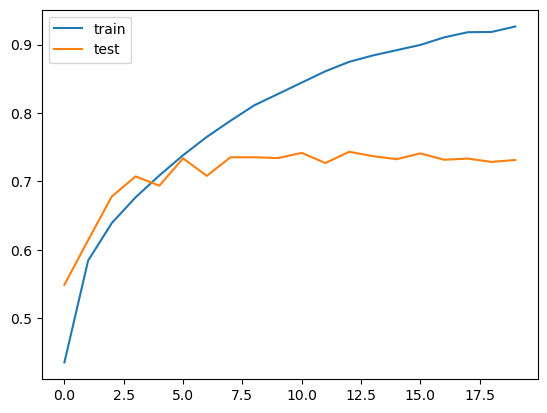

In [83]:
# plot accuracy to see the gap 
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

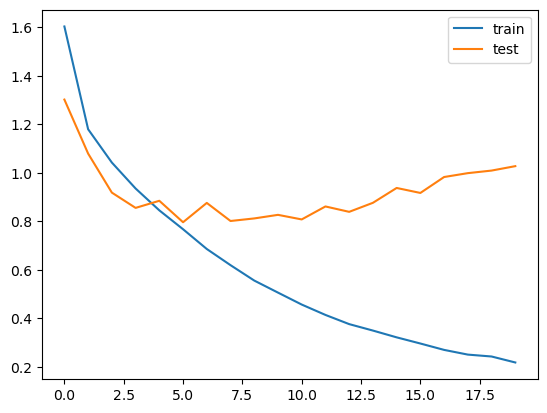

In [84]:
# plot accuracy to see the gap 
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

# L2 Regularization

Since you will typically want to apply the same regularizer to all layers in your network,
as well as the same activation function and the same initialization strategy in all
hidden layers, you may find yourself repeating the same arguments over and over.
This makes it ugly and error-prone. To avoid this, you can try refactoring your code
to use loops. Another option is to use Python’s functools.partial() function: it lets
you create a thin wrapper for any callable, with some default argument values

In [244]:
from functools import partial
RegularizedDense = partial(keras.layers.Dense,
activation="selu",
kernel_constraint=keras.constraints.max_norm(1.),
kernel_initializer="lecun_normal",
kernel_regularizer=keras.regularizers.l2(0.01))

In [235]:
# bulid the model
model=keras.models.Sequential([
    # First Conv2D layer
    keras.layers.Conv2D(filters=64,kernel_size=5,input_shape=[32,32,3],
                        padding='same',activation='elu',kernel_initializer='he_normal'),
    keras.layers.MaxPool2D(pool_size=2),
    # second Conv2D layer
    keras.layers.Conv2D(filters=64,kernel_size=5,padding='same',activation='elu',
                        kernel_initializer='he_normal'),
    keras.layers.MaxPool2D(pool_size=2),
    # flatten layer
    keras.layers.Flatten(),
    
    # First layer for deep neural net
    RegularizedDense(300),
    keras.layers.Dropout(0.2),
    # second layer
    RegularizedDense(100),
    keras.layers.Dropout(0.2),
    # third layer
    RegularizedDense(75),
    keras.layers.Dropout(0.2),
    
    # output layer
    RegularizedDense(10,activation='softmax',kernel_initializer='glorot_uniform'),
])

In [236]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_33 (Flatten)        (None, 4096)              0         
                                                                 
 dense_121 (Dense)           (None, 300)             

In [237]:
# comopile the model
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='nadam')

In [238]:
# train data
history=model.fit(X_train,y_train,validation_data= (X_val, y_val),batch_size=50,epochs=50)

Epoch 1/50
950/950 [==============================] - 78s 80ms/step - loss: 2.8253 - accuracy: 0.4530 - val_loss: 1.7024 - val_accuracy: 0.5588
Epoch 2/50
950/950 [==============================] - 73s 77ms/step - loss: 1.6744 - accuracy: 0.5452 - val_loss: 1.5735 - val_accuracy: 0.5680
Epoch 3/50
950/950 [==============================] - 74s 78ms/step - loss: 1.5738 - accuracy: 0.5765 - val_loss: 1.5158 - val_accuracy: 0.6048
Epoch 4/50
950/950 [==============================] - 74s 78ms/step - loss: 1.5517 - accuracy: 0.5914 - val_loss: 1.5073 - val_accuracy: 0.6076
Epoch 5/50
950/950 [==============================] - 75s 79ms/step - loss: 1.5270 - accuracy: 0.6085 - val_loss: 1.5442 - val_accuracy: 0.5984
Epoch 6/50
950/950 [==============================] - 4218s 4s/step - loss: 1.5096 - accuracy: 0.6224 - val_loss: 1.4594 - val_accuracy: 0.6372
Epoch 7/50
463/950 [=============>................] - ETA: 35s - loss: 1.4873 - accuracy: 0.6327

KeyboardInterrupt: 

In [ ]:
# plot accuracy to see the gap 
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

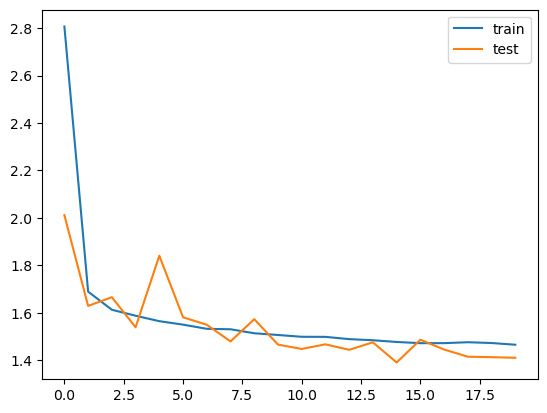

In [102]:
# plot accuracy to see the gap 
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

<html> 
 
<body> 
    <h1 style="color:green;">2.Exponential scheduling</h1> 
     <font size="4">🦆In this technique we set the learning rate to  number. </font> 
    

<font size="4">**Formula**
>  <font size="4"> lr = lr0 * 0.1**(epoch / s)  
>     here,  
>           lr0 ---->  is the initial learning rate  
>           s   -----> steps     
 
 <font size="4"> 🦢The learning rate drops gradually by a factor of 10 every s steps.

In [24]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.1, s=5)

In [313]:
# bulid the model
model=keras.models.Sequential([
    # First Conv2D layer
    keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[32,32,3],
                        padding='same'),
    keras.layers.MaxPool2D(pool_size=2),
    # second Conv2D layer
    keras.layers.Conv2D(filters=64,kernel_size=3,
                        padding='same'),
    keras.layers.MaxPool2D(pool_size=2),
    # flatten layer
    keras.layers.Flatten(),
    
    # First layer for deep neural net
    keras.layers.Dense(units=300,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.Dropout(0.3),
    # second layer
    keras.layers.Dense(units=100,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    # output layer
    keras.layers.Dense(units=10,activation='softmax',kernel_initializer='glorot_normal'),
])

In [314]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_109 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 8, 8, 64)         0         
 ng2D)                                                           
                                                                 
 flatten_50 (Flatten)        (None, 4096)              0         
                                                                 
 dense_166 (Dense)           (None, 300)             

In [315]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [316]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
early_stopping= keras.callbacks.EarlyStopping(patience=8,verbose=1)
history = model.fit(X_train, y_train, epochs=50,
                    batch_size=100,
                    validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler,early_stopping])

Epoch 1/50
450/450 [==============================] - 23s 47ms/step - loss: 1.9000 - accuracy: 0.3048 - val_loss: 1.6310 - val_accuracy: 0.3858 - lr: 0.0100
Epoch 2/50
450/450 [==============================] - 23s 50ms/step - loss: 1.4059 - accuracy: 0.4974 - val_loss: 1.2557 - val_accuracy: 0.5444 - lr: 0.0079
Epoch 3/50
450/450 [==============================] - 22s 50ms/step - loss: 1.1642 - accuracy: 0.5895 - val_loss: 1.0677 - val_accuracy: 0.6208 - lr: 0.0063
Epoch 4/50
450/450 [==============================] - 21s 47ms/step - loss: 1.0055 - accuracy: 0.6465 - val_loss: 1.0316 - val_accuracy: 0.6438 - lr: 0.0050
Epoch 5/50
450/450 [==============================] - 21s 47ms/step - loss: 0.8828 - accuracy: 0.6928 - val_loss: 0.9371 - val_accuracy: 0.6708 - lr: 0.0040
Epoch 6/50
450/450 [==============================] - 21s 47ms/step - loss: 0.7716 - accuracy: 0.7312 - val_loss: 0.8600 - val_accuracy: 0.7010 - lr: 0.0032
Epoch 7/50
450/450 [==============================] - 21s 

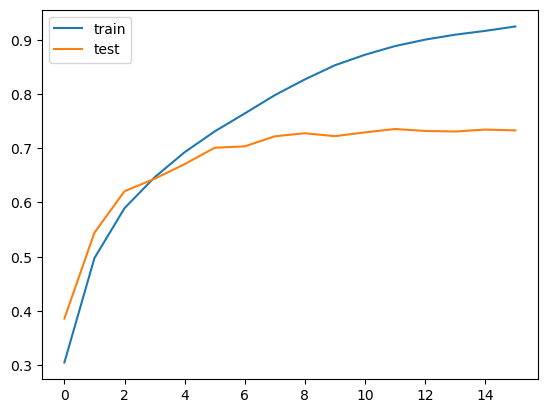

In [317]:
# plot accuracy to see the gap 
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

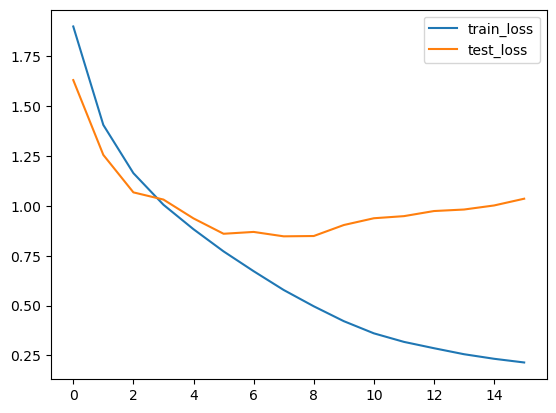

In [318]:
# plot accuracy to see the gap 
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='test_loss')
plt.legend()
plt.show()

# Change Architecture and reduce complexity

In [456]:
# bulid the model
model=keras.models.Sequential([
    # First Conv2D layer
    keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[32,32,3],activation='selu',
                        kernel_initializer='lecun_normal',
                        padding='same'),
    keras.layers.BatchNormalization(),
    # second Conv2D layer
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='selu',
                        kernel_initializer='lecun_normal',
                        padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    # third Conv2D layer
    keras.layers.Conv2D(filters=64,kernel_size=3,activation='selu',
                        kernel_initializer='lecun_normal',
                        padding='same'),
    keras.layers.BatchNormalization(),
    # fourth Conv2D layer
    keras.layers.Conv2D(filters=64,kernel_size=3,activation='selu',
                        kernel_initializer='lecun_normal',
                        padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
        
    # flatten layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    # deep neural net
    keras.layers.Dense(units=256,activation='selu',kernel_regularizer=keras.regularizers.l2(),
                       kernel_initializer='lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    # output layer
    keras.layers.Dense(units=10,activation='softmax',kernel_initializer='glorot_normal'),
])

In [457]:
model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_168 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_119 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_169 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_120 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_133 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                     

In [458]:
model.compile(loss="binary_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [459]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
early_stopping= keras.callbacks.EarlyStopping(patience=3,verbose=1)

In [460]:
history = model.fit(X_train, y_train, epochs=50,
                    batch_size=50,
                    validation_data=(X_val, y_val
                                    ),
                    callbacks=[early_stopping,lr_scheduler] 
)

Epoch 1/50
900/900 [==============================] - 77s 82ms/step - loss: 2.6334 - accuracy: 0.4649 - val_loss: 2.2877 - val_accuracy: 0.5226 - lr: 0.0100
Epoch 2/50
900/900 [==============================] - 74s 82ms/step - loss: 1.8545 - accuracy: 0.6177 - val_loss: 1.7621 - val_accuracy: 0.6154 - lr: 0.0063
Epoch 3/50
900/900 [==============================] - 73s 81ms/step - loss: 1.4826 - accuracy: 0.6726 - val_loss: 1.4756 - val_accuracy: 0.6588 - lr: 0.0040
Epoch 4/50
900/900 [==============================] - 74s 82ms/step - loss: 1.2242 - accuracy: 0.7099 - val_loss: 1.1303 - val_accuracy: 0.7422 - lr: 0.0025
Epoch 5/50
900/900 [==============================] - 73s 82ms/step - loss: 1.0457 - accuracy: 0.7408 - val_loss: 0.9768 - val_accuracy: 0.7612 - lr: 0.0016
Epoch 6/50
900/900 [==============================] - 75s 83ms/step - loss: 0.9018 - accuracy: 0.7656 - val_loss: 0.8687 - val_accuracy: 0.7670 - lr: 0.0010
Epoch 7/50
900/900 [==============================] - 74s 

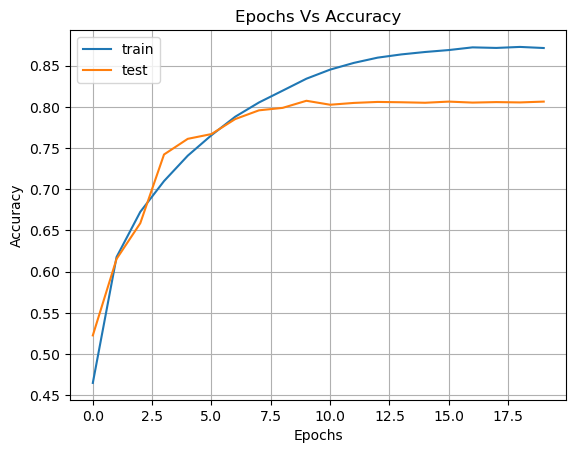

In [461]:
# plot accuracy to see the gap 
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs Vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [463]:
model.evaluate(X_test,y_test)

79/79 [==============================] - 2s 18ms/step - loss: 0.3557 - accuracy: 0.9124


[0.3557264506816864, 0.9124000072479248]

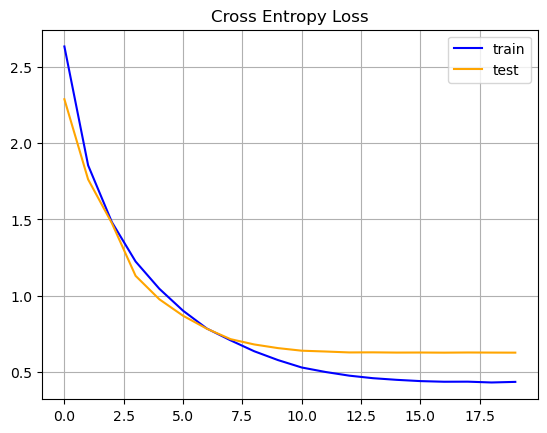

In [473]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()
plt.grid(True)
plt.show()

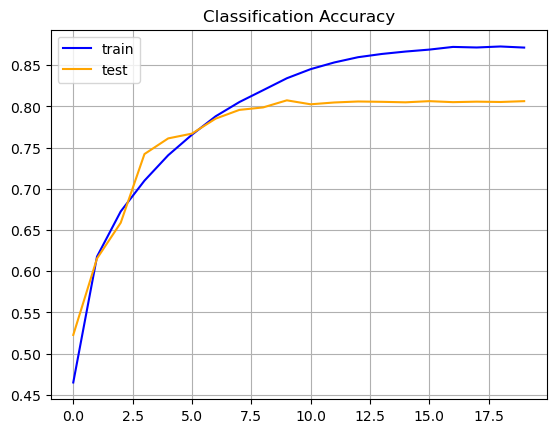

In [474]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()
plt.grid(True)
plt.show()